# Research - Sentiment Analysis

Sentiment Analysis is a very simple Classification problem, the goal is, then, split the database into halfs, one for each class. The below example has only 2 classes, positive and negative feedback.

The data is going to be preprocessed in order to get rid of words are not useful for the task, then it will be transformed into numbers (vectors), from this moment forward, the data is going to be treated as an array of numbers, so machine learning algorithms may deal with it.

Once ready, data is going to be trained in one Classifier and its results (weights) are going to be persisted in disk to be used later, on the backend.

## Imports

NLTK - Preprocess Word related databases

PANDAS - Deals with data ans structures

SEABORN and MATPLOTLIB - Plot data values

SKLEARN - Classification Algorithms and some Preprocessors

PICKLE - Deals with store data

In [5]:
import pickle

import nltk
from nltk import tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Use inline plots
%matplotlib inline

## Uploading database and taking a look

In [7]:
reviews = pd.read_csv('data/imdb-reviews-pt-br.csv')

In [9]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [11]:
print('This is a negative review:\n\n', reviews.text_pt[0])

This is a negative review:

 Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar um

In [13]:
reviews.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [15]:
reviews.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

## Preprocessing Database

In [17]:
reviews['binary_sentiment_repres'] = reviews.sentiment.replace(['neg', 'pos'], [0,1])
reviews.head()

,id,text_en,text_pt,sentiment,binary_sentiment_repres
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [19]:
vectorizer = CountVectorizer(max_features=100)

In [21]:
# If you want to put everything on a sparse DataFrame, but is not a good idea!
# bow = vectorizer.fit_transform(reviews.text_pt)
# df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=vectorizer.get_feature_names())

In [23]:
whiteSpaceTokenizer = tokenize.WhitespaceTokenizer()

def get_occurs_df(column):
    all_words = ' '.join([item for item in reviews[column]])
    review_tokens = whiteSpaceTokenizer.tokenize(all_words)
    occurencies = FreqDist(review_tokens)
    return pd.DataFrame({
        'words': list(occurencies.keys()), 
        'occur': list(occurencies.values())
    })

In [25]:
def plot_samples(df, n=10):
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df.nlargest(columns='occur', n=n), x="words", y="occur", color='green')
    ax.set(ylabel='Count')
    plt.show()

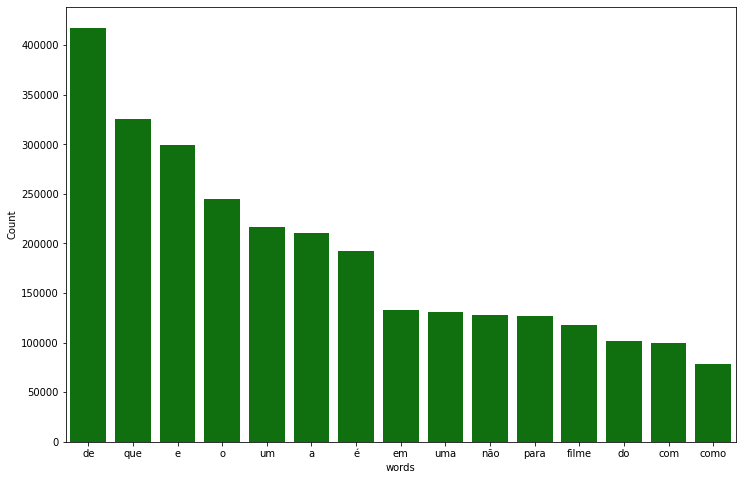

In [27]:
df_occur = get_occurs_df('text_pt')
plot_samples(df_occur, n=15)

In [29]:
nltk.download('stopwords')
irrelevants = stopwords.words("portuguese")

processed_sentece = list()
for each in reviews.text_pt:
    filtered_sentence = list()
    wordish = whiteSpaceTokenizer.tokenize(each)
    for item in wordish:
        if item not in irrelevants:
            filtered_sentence.append(item)
    processed_sentece.append(' '.join(filtered_sentence))

reviews['preprocess_1'] = processed_sentece    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
reviews.head()

,id,text_en,text_pt,sentiment,binary_sentiment_repres,preprocess_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


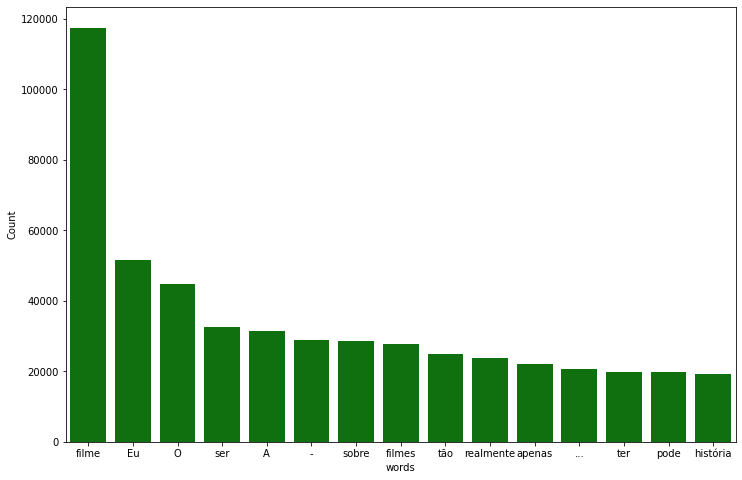

In [33]:
df_occur = get_occurs_df('preprocess_1')
plot_samples(df_occur, n=15)

## Making Predictions

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

bow = vectorizer.fit_transform(reviews.preprocess_1)
print("Bag of words shape", bow.shape)

trX, teX, trY, teY = train_test_split(bow, reviews.binary_sentiment_repres.values.reshape(-1, 1), random_state=9)
print("Train and Test X shapes:", trX.shape, teX.shape)
print("Train and Test Y shapes:", trY.shape, teY.shape)

regressor = LogisticRegression(solver="lbfgs")
regressor.fit(trX, trY.ravel())
print("acc:", regressor.score(teX, teY.ravel()))

Bag of words shape (49459, 100)
Train and Test X shapes: (37094, 100) (12365, 100)
Train and Test Y shapes: (37094, 1) (12365, 1)
acc: 0.7078042862919531


In [37]:
def make_a_prediction(phrase):
    return 'Positive' if regressor.predict(vectorizer.transform([phrase])) else 'Negative'

In [39]:
#while True:
#    phrase = input('Digite o que achou do Filme "De volta para o Futuro": ')
#    print(make_a_prediction(phrase))

## Store Data for API usage

Take a look at the [Sklearn Docs](https://scikit-learn.org/stable/modules/model_persistence.html#persistence-example) for more about data persistence and how to load data back.

In [41]:
from joblib import dump
dump(regressor, 'models/sklearn-logistc-regressor-model.joblib') 

['models/sklearn-logistc-regressor-model.joblib']

In [43]:
pickle.dump(vectorizer, open("models/vectorizer.pickle", "wb"))